In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import MobileNetV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **PREPROCESSING DATASET**

In [2]:
height = 224
width = 224
channels = 3
img_shape = (height, width, channels)
img_size = (height, width)

In [3]:
TRAINING_DIR = "/kaggle/input/dataset-food-indonesia/Dataset/Train"
VALIDATION_DIR = "/kaggle/input/dataset-food-indonesia/Dataset/Val"
TEST_DIR = "/kaggle/input/dataset-food-indonesia/Dataset/Test"

**With Training Data Augmentation**

In [4]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=img_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=123
)

labels = train_generator.class_indices
print(labels)

with open('food_label.txt', 'w') as f:
    for food_class in labels:
        f.write(f'{food_class}\n')

Found 10320 images belonging to 43 classes.
{'Ayam_Crispy': 0, 'Ayam_Kecap': 1, 'Ayam_Serundeng': 2, 'Bakso': 3, 'Brownies': 4, 'Bubur_Ayam': 5, 'Capcay': 6, 'Cumi_Bakar': 7, 'Cumi_Hitam': 8, 'Cumi_Rica': 9, 'Dimsum_Ikan': 10, 'Garang_Asem': 11, 'Gulai_Kambing': 12, 'Ikan_Bakar': 13, 'Ikan_Goreng': 14, 'Kentang_Balado': 15, 'Kue_Bolu': 16, 'Nasi_Bakar': 17, 'Nasi_Goreng': 18, 'Nasi_Kuning': 19, 'Nasi_Merah': 20, 'Nasi_Rames': 21, 'Opor_Ayam': 22, 'Pancake': 23, 'Pecel': 24, 'Pepes_Ikan': 25, 'Perkedel_Kentang': 26, 'Pukis': 27, 'Rawon': 28, 'Rendang': 29, 'Salad_Sayur': 30, 'Sate_Ayam': 31, 'Sate_Kambing': 32, 'Sayur_Asem': 33, 'Sayur_Sop': 34, 'Soto_Ayam': 35, 'Telur_Balado': 36, 'Telur_Dadar': 37, 'Tumis_Kacang_Panjang_Tahu': 38, 'Tumis_Kangkung': 39, 'Tumis_Terong': 40, 'Udang_Asam_Manis': 41, 'Udang_Goreng_Tepung': 42}


**Without Training Data Augmentation**

In [5]:
# train_generator = tf.keras.utils.image_dataset_from_directory(TRAINING_DIR,
#                                                        labels='inferred',
#                                                        color_mode='rgb',
#                                                        label_mode='categorical',
#                                                        shuffle=True,
#                                                        image_size=img_size,
#                                                        seed=123)

**Preprocessing Data Validasi & Test**

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                   class_mode='categorical',
                                                                   color_mode='rgb',
                                                                   shuffle=False,
                                                                   target_size=img_size,
                                                                   seed=123)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                class_mode = 'categorical',
                                                target_size = img_size,
                                                shuffle = False)

Found 1290 images belonging to 43 classes.
Found 1290 images belonging to 43 classes.


In [7]:
# labels = train_generator.class_indices
# for class_number, class_name in enumerate(labels):
#     print(f'Nomor: {class_number}, Kelas: {class_name}')

In [8]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32, 43)


# **Create Model with MobileNetV3**

In [9]:
# Callback EarlyStopping untuk menghentikan pelatihan jika val_loss tidak berkurang
early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [10]:
# Model menggunakan pre-trained MobileNetV3
base_model = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet')

# Membuat model sederhana di atas pre-trained MobileNetV3
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(43, activation='softmax')
])


9406464/9406464 [==============================] - 1s 0us/step


In [11]:
# # Mengatur model untuk pelatihan
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Menampilkan ringkasan model
# model.summary()

# # Pelatihan model
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=10,
#     batch_size=32,
#     callbacks=[early_stopping_callback]
# )

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Mengatur model untuk pelatihan
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Menampilkan ringkasan model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [13]:
# Pelatihan model dengan menggunakan callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping_callback]
)

Epoch 1/20
 88/323 [=======>......................] - ETA: 2:52 - loss: 4.5128 - accuracy: 0.0689

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


323/323 [==============================] - 293s 801ms/step - loss: 3.1970 - accuracy: 0.2428 - val_loss: 2.2900 - val_accuracy: 0.3938
Epoch 2/20
323/323 [==============================] - 199s 616ms/step - loss: 1.5679 - accuracy: 0.5582 - val_loss: 1.7011 - val_accuracy: 0.5543
Epoch 3/20
323/323 [==============================] - 199s 615ms/step - loss: 1.1550 - accuracy: 0.6653 - val_loss: 1.2066 - val_accuracy: 0.6488
Epoch 4/20
323/323 [==============================] - 197s 608ms/step - loss: 0.9201 - accuracy: 0.7259 - val_loss: 0.9596 - val_accuracy: 0.7186
Epoch 5/20
323/323 [==============================] - 196s 606ms/step - loss: 0.7365 - accuracy: 0.7830 - val_loss: 0.9334 - val_accuracy: 0.7279
Epoch 6/20
323/323 [==============================] - 198s 613ms/step - loss: 0.6354 - accuracy: 0.8064 - val_loss: 0.7587 - val_accuracy: 0.7791
Epoch 7/20
323/323 [==============================] - 199s 615ms/step - loss: 0.5504 - accuracy: 0.8309 - val_loss: 0.7349 - val_accura

Akurasi pelatihan: 0.9548449516296387
Loss pelatihan: 0.1458599865436554
Akurasi validasi: 0.8395348787307739
Loss validasi: 0.6287250518798828


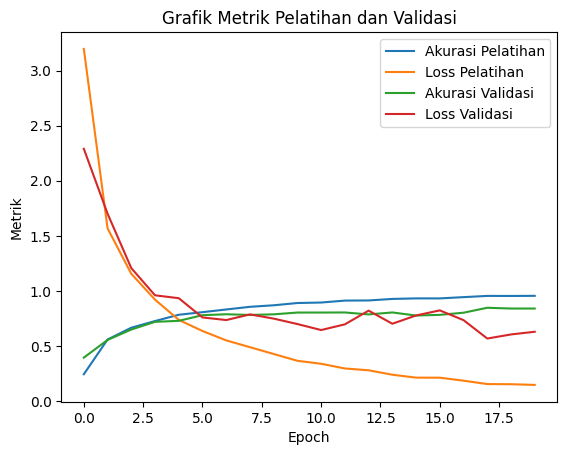

In [14]:
import matplotlib.pyplot as plt

# Cetak metrik pelatihan dan validasi
print("Akurasi pelatihan:", history.history['accuracy'][-1])
print("Loss pelatihan:", history.history['loss'][-1])
print("Akurasi validasi:", history.history['val_accuracy'][-1])
print("Loss validasi:", history.history['val_loss'][-1])

# Plot grafik metrik pelatihan
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['loss'], label='Loss Pelatihan')

# Plot grafik metrik validasi
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.plot(history.history['val_loss'], label='Loss Validasi')

# Tambahkan label dan judul
plt.xlabel('Epoch')
plt.ylabel('Metrik')
plt.title('Grafik Metrik Pelatihan dan Validasi')
plt.legend()

# Tampilkan grafik
plt.show()

# **Test Model Accuracy**

In [15]:
model.evaluate(test_generator)

41/41 [==============================] - 19s 457ms/step - loss: 0.6833 - accuracy: 0.8279


[0.6832992434501648, 0.8279069662094116]

41/41 [==============================] - 11s 256ms/step


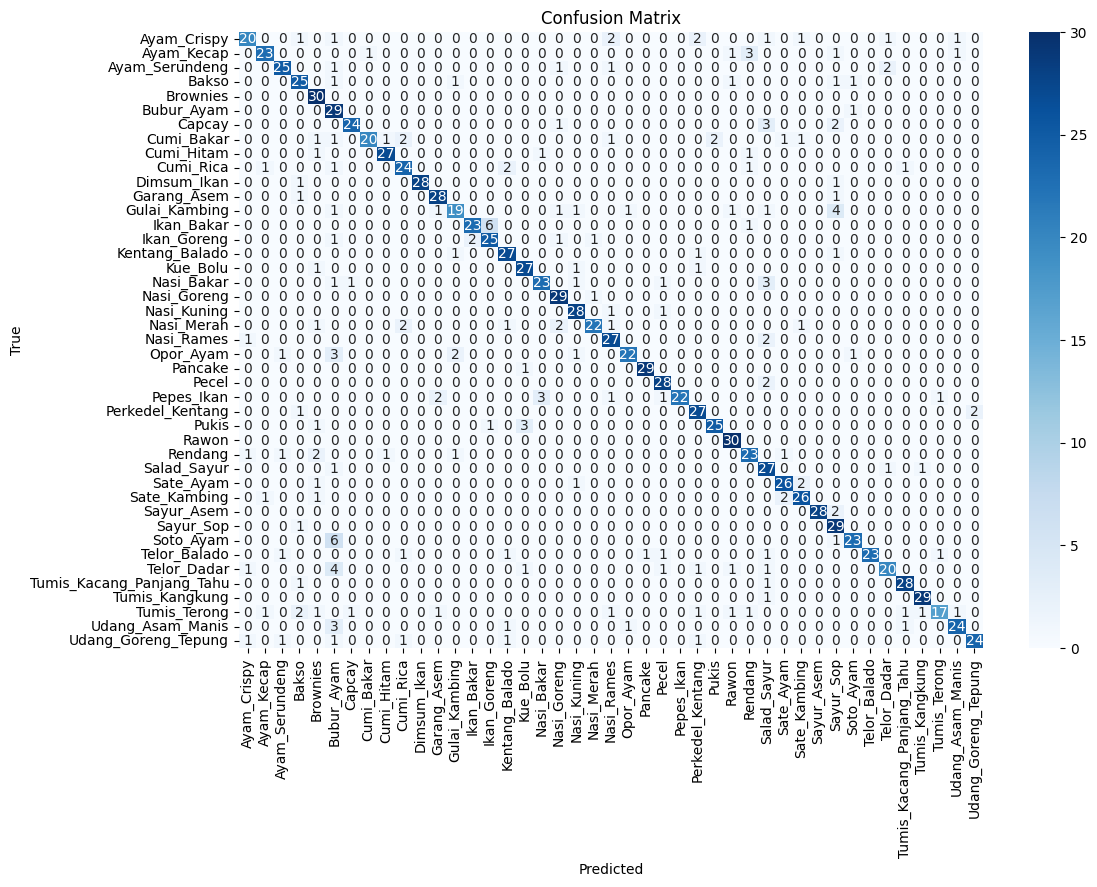

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas dari data uji
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Ambil label yang sebenarnya
y_true = validation_generator.classes

# Dapatkan nama kelas
class_names = list(validation_generator.class_indices.keys())

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Mendapatkan prediksi dari model untuk data validasi
y_pred = model.predict(validation_generator)

# Mengubah hasil prediksi menjadi kelas yang benar-benar diprediksi (0 atau 1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Menghitung precision, recall, dan f1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Menampilkan classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


41/41 [==============================] - 10s 253ms/step
Precision: 0.8561615030678085
Recall: 0.8395348837209302
F1 Score: 0.8398797065352084
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.88      0.77      0.82        30
           2       0.86      0.83      0.85        30
           3       0.76      0.83      0.79        30
           4       0.75      1.00      0.86        30
           5       0.53      0.97      0.68        30
           6       0.92      0.80      0.86        30
           7       0.95      0.67      0.78        30
           8       0.93      0.90      0.92        30
           9       0.80      0.80      0.80        30
          10       1.00      0.93      0.97        30
          11       0.88      0.93      0.90        30
          12       0.79      0.63      0.70        30
          13       0.92      0.77      0.84        30
          14       0.78 

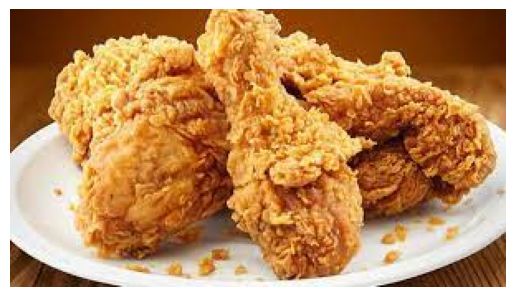

1/1 [==============================] - 1s 1s/step
Prediksi: Perkedel_Kentang
Skor Kategori: 0.39605555


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import urllib
from PIL import Image

# URL gambar yang ingin diuji
image_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBMVExcVFRUYGBcZGhoYGRoYGxocIRkZIB0aGhodIxwdHysjIBwoHxoaJTUkKC0uMjIyISE3PDcwOysxMi4BCwsLDw4PHRERHTMoISkzMTMuMzQxMTMzNDExMTEuMTkzMzExMzEuMTExMzExMTExMTExMTExMTExMTExMTExMf/AABEIAKgBLAMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAEBQIDBgAHAQj/xABAEAACAQMDAgQEAwYFAwIHAAABAhEAAyEEEjEFQSJRYXEGE4GRMqGxB0JSwdHwFCNy4fFigqIzkhUWJERjstL/xAAZAQACAwEAAAAAAAAAAAAAAAACAwABBAX/xAAuEQACAgICAQMCBgICAwAAAAABAgARAyESMUEEE2FRcSIygZGhsdHwYvEUI1L/2gAMAwEAAhEDEQA/APMwKmKiBUxWEzpCSAqYFfAKmooCYYkhU1FfFFTUUswxPqirAK+AVIUBMsT6BX0CuAqQ/ShhzgKkBVuo07o224rI0AwwIMEAjB9DUaEyCfIqUVwqQFDcKfbaEkKoliQAPMkwB9zXqGk0pt2k0yCNgG8zmeX4Hck5rE/Bdhm1VtgjMqMSxAwnhaCTwM59YxNei3LbFbh53bY9cmPzpeU6r73Fsd/73cD1GqFogB9qsYljuAxK88DkUAdTaS/4023DkuBG7/qEd+Per+tpaFtxcWByP9UQI9v50F0PU7barcBJXxWywIYAKQY8xzSlu9wwF43U0BuW7qbSFZcYuAMCf9J70j1Pwppbj3Lm5rcllCJs2I34QQNsxMHb6+1Haa58y9vIEDBDgDIAiBzMGmWo08rK7ZnkrPbOfpT0yE6mdl4nWp5N1DRvac27gG4RwZEHIP1GcwaGitJ8baq3cZFVCropDE4lTBQH1HiPoGA9gukfD+ov5t24WCQ7+FT7E8z6YoiN6mgOONtE8V8IovqGiu2X2XEKN5HuPMHgj1FDEVXUIUepAiokVMiuIq7lSs1EirIqJFEDKqVkVEipkVEirEqQIqsiriKgwoxAIlTCqyKtIqDCjBlESlhUSKsIqJowYBlJFfKmajFGIBE4VMCorUxVGWJICrFFQWrFFAYYk1FTUUd8N2LdzVWbdz8D3FVh5yYA+pgV6P8AEnw7pbsW0tC26bfFaSIWRIIGIIkAmYOfQqd1Wr8yXuqmH6L8L6rUIr20XYxYBmYKPDz6xOJjkGtp0P4LsW7A/wARb33WncA7eDPC7CO3fvR/wPor2n0/yru3crvt2kHwkiAD6sSfYinfzv3WBVoyR/fHFKyZa1/MWSxPxFFv4U0nyFt/J3hZIZvDcJJky4g/TiKZafRW7NgW7ahFUECR55JJP4iT96ix2bi7KFb8LDzqOmv3HYBkhDJDDgqBj68Ur3SdSuJ7vUEboVvVQ+qtLv2qJV2nbMwdpAkQfPk02taS2tsW7aoEACwwkbBOM8nPfzNDFVtA7S0zgGWn3794pVd64Dd+TtZC87eOwk9/ISPtU90gcfMIY2c2Opf1j4Z0t5I2JbeRDWwFPPcRBEdo+1ZX4j+EDa3XLLB7apuIcw8j8UACCIE+fI8q0JvqH5OBiczJkd85/Wheoa6Mz+8sj3YCPX/eh/8AIPkR6YWU6MZfCy210tjYIDIpMjl+HJ9dwOfKKbloRmMyDI/QUNo0RRbFsKEjwKMADJkf0pZ1rqothw5kceHsR/WT9qDI1E1u7qLTGXah/u4HduC853MNqCWB4JAJj2xJqHUdSi7SWZncDBCiEXIIAyAZIA9aWWQxXcimGJifYggieM1V1C0bRO5idvgk8DvAP1NDjQgVNjKLoRt0e6ty7O4rKgCBPiERkiDgxn+VaL5hUbS0/vT54/5rOdM0/wAtF/zPC67pKwVbwxA8j6+XrTUNnd3xEjEdz7DNGNG4nIAYQLWm1O249pbhA2hmUmBzB+8gEedMFyRtG0ADacbY4iO2KC0TABtqou8lz2LEgeL0r5rOpxcW2U/FO1jwcSTP070bOeOyZn9slqAl/V+k2b+w3BvCboBJAkxzEE8edYXU/CF9r7qgRbZJZW3kqFLGFyNxIHaPLOa0N3qnilidkkERyRgfmKI02vUsCuUPmIKz+6RzVDOCNiOXE6DU8y1VhrbsjCGVirDmCDBzVJrffEXwv827utugdgCyuNo4jcNoJkkZB95rH9R6Xeski5bZYMTB2nvhhg00b2ISuDACKiRRN3TOqI5XwPuCN2JUww9waHarhSsiokV6X0z4f0SWrYvWwz7VZncssswBIwQIHEUB8afDFpbPztMm3Z4riqWIKdyAScrzjtPlVqyk0DE8/iYE1E1MiomjEIyphUGFWtVbCjBgmVMKrIq5hVZFMEEysioRVjCoUYgwsaevosUWFqJFI5mHUoFqiundPuXri27a7nb7Ad2J7KO5qs1s/wBl2nLHUMv4gttQY4kuTn/tH5VRYgEyjqaTpnSLGlskW0DEMCzuASzADacjwgESAOOaedO07BmuO0g9h/GJBPtSq4wsWiGK3Gdo9yRgQf0oy9qitlYGQqs3kD3/ADmsDZNktuv7kZSRQ8+fiWXSSzN4diANAP72ee+AP0pdc1Fxi6gEuVJgZhMTDcTNNGZQZQBpywPcdsfeg9FavIzNbRflsZWSARP4sE9oihOzRkUgD+rnzWuTp/loAzMB4WjAHMT3zRulc7VE/hQB+wDALIMd80svIWcFEG6SNmRDTkg8DAJj0ovql8i38tHCsxCgnGSJwO8CiSyP6/xI6jQH3MX9e6sEOWgwR4Rz6D9KRafqey2t51A8LFjEmGnaY/7R7U7/APlpHBN12djjdxtxHhA5Mzk/ap6jRW7QCW7BcwACfEIjaOSfX71ZXye49ciAcVnnNz4hbxKAJ3SDmQs4HMT61L/HvdOxgyiQ3qWHEnyret00Lk2bSk8lVXOP4oFLNTpLSqXE7jO3IOM5ECiOVB0tR6uDLfhrqlxYttmZKYmCe2OBMnNQ65pjDM258S3lPE+XM0Da1y2rkl4wZWImQad9P6kl5CMOZgqYOI/F7EzHtSyCdyvytyAkOjLbZLe1h4Ns9oMgAf8AupZ1NhduNaEseADg+H8TZwDP95ppY06jcLakIylTA/C3Ygc4MUhv/OW8XBUuCFwJBDeEk95JUGPOiGzKUdxq63rdq0xgtBRo8QKqfCTjEAie1Nen60EorypPIM8iAD9ZoLT3HvacPaO/JW4qhvCxQyBI8Q8Q4qzol3fNt/xDuBP8JI9sChNrsd/xANFd+P3hbW0tiWubWLkAsYBkkhfy/uaHuQ1pnvqVVSIZWmImTiYEd/Wkf7TRfthbiEm2oAuCfwOWU23jmZMSPSl3wJ8WBd1q4A28gA/ece1aThPDmOvNQA1jvc1Wi6hp9y27eVMjtGTgzycV2lAa60IRtMM3YZkyQPLt5GlLaDRpde6HIWQUtr4VXHi+hMn6xTfp3VbpO1AXBk/hwF8t3B/WsbgdDf6RlGrA/eF2LVrfvt3DuUiQZbBxHn3xT/5h2jBIPl/Q1jrmjurf3Fhp7AVVwNxd5JMSYAyMny4p7pXdT/6m9e0iCfyijW0P3/iIyqGo3+/+ZZr7Fq5b2NbDIchNvBzkERDc+tLNP0jSW4ZNPLCILgscdxuxNMFuX1naihf9QMDzOa+67U29oDgyewJyYkj86Z7hPkj9ICpWu/sZY1lLgcMBuOFMbgMYntzSPo95JuW3dnY7kIOFblYjmCP1FNem62yqAKdsiYOTknkn249KJXUWiS8IREFtoyOCCTQgAgG9wrZQVo0Z5X8SaC1avstszbIRk8W6AVBie+Z+kUu+TXqXUfhfR3gSifLIAAa3gCAIlT4TiKzrfBbC27G8rFQxVbaMxaASBzMmB2P1rXY+sFX1uY35Fd/hxROp01xDtdWU+TAg/Y1SEM1cOR/wQqh9HTO0piookmoGMhEXLoxX3/AijrqkVJIImr5mTiIIRVLmrbhqsJUlT4Fr0X4Bs3LWmDNhbl0OAOShUIJ9yuB5e9YTRWN7ohO3cyrJ7AkCfpM16rvW3baJ22wFUGOAAJ+wA95peRqEqrMu1OmDMoAVmQ7lnJUngx54irk02+2VYw2GYNx/pjsO1cpKohbwuYLQJzAkGO3ND6bWK126m4nwr+ETALEEzHPGKykC6qVbEWPEZae2F8Tfij0xxj1qvSXEdyMYkyZnGPoKG6rq1S2zR+Abc5kzjPfFJena/U/NG/Tsq7WV3gzBjbtXzn7wavZYCtCUMZZSxjD4j6myZtnI7enf8s13TtTbe4zFW3KIUwTEjMNwCcCPU1BtOq3gLpmIKx3zmR6YxS7qXxKVvFEQlVZdxUEgSe4HFGDv5uOCWOKjx3CfiC6y7AxuKoKkwA0+Yk8e9A6zV3LVwTdYJMqDynB2n/pAqXVrpuPIuQCGEMI89sycSR9PSrtZYtwkruUlVZiSIH4Yxkj+dDe4YAAAIi74i66S5ADQBHh7mJ5pI2quuZS24jse4I5/nNP9RbTT3SgnbcBADEHYYGZ5yBFL01YAiTCsQDIkISSMckDt70SqvfcNWoUBFgBuKbd5DGYbgr5AGh/h7UNpNULTtC3IXdMCM7PY7p+9Xa3qIckgg+In/Sc9v4SIqnV3GuMX+XKFdsAgn6U9NCiNGRgTNl0C+VcAN4CXmfOeZ7nH5GqU06vqLrNlBvYjgZnaJ85/Q0J8NWt9iWYgqWAVu38M9+B+dMrybLClQQGcEnmQMY96y5NaEodn5ndL1yAGyi/LCbnJE4GBIHnJH3oz/HMtzbu3dyQI3YmR/fnWfv3yjvtyroEJaZyAzwR6j2oqxqlDpPfaF5zPfPvSHU/5h8Bs1NL1Gwly0y3BKXFNtxx4WkYPM5FeV/FXwLe0hW5ZdrqE9lh0jIJAMEHzH2r0+8jF1UgMn4twMbQABE+cmfoal8y2wa2xPi8MYwBgEetbMHqWxivExHHexMR8M2bd0fNZC9xIV7bgqFYieD+IR3OPStRpuoIAbS2oZMBVx2kYnEzyJpc/w4XvwzkWRJLAw0YhMcNM54j1MBd1P4de2RAuXWktMFgFkjbuGSYIM4zxwYFgrHv9O5ptWoMZpU6wnBYJtMEEyR7rz9avu9QtPkNMeLykrnE/pWIv6+E8bswEbSQPSZ7yPWu6bce6rsD4QRk+ZyPbiqIatdQ/aXua7R9QCqLhYbHbYecCCZ+hEVnuv9Qe3fZGaYAKyeQ2f5R7D3qgam46rZKldn4u58MgGOe9Lr73GG53G5ZUAyYUEnPf2NTFiAFeJdUbjrp3X22GbSPBO1mADAEy35k/eidK4e1cUvLbgdh/DBzhRkkfXg4pH07TAjc9w2ifw8EHPiPMgeWKut6e180/Mc3GkeFGIVgJklsMZ5xHEZomAlEDxGdzXC1Ns3cBDtuDO44EEniMDGeKI6Z1pXwXUKNw3YGQRERGYIM+4qq11ZEtIHtKUWVQMA4GGBgmZlZ4ya+aEWtQztuY2wZ8Y2FmIkxCgqFyPXjGaEVV1KP/ACEc9P1lvUqPm21dFBh3UEbhjE59DVHUfhJLl1ntOlsETsK43R2M4Bg9sUssaZFQ73PygThmIxBgLH4iWIyTwfeXdrqd1Vt+ICUSd8ZJHc9zNQZePyIrJjs2mpltT0x7eHQqfI9/6iqLelgV6IHtFSHCtkyGEjvgTxxSTrGiRYKIUU+8E84n+tNVuQ1FBj0Zk7ulmqhoa02n0uJIqq7pBNMEu5h9smpTAqRxWp+Fvgq7qIuXibVo5A/fuD0B/Cv/AFHnsO9NTGWNCA7hRZma6bpb15/l2rbXG8lHA8yeFHqSBXpmm6PqlsIdQ6M4IBCk/gmYY8M3qB9+a0vSun2bFsJatrbUdhyT5knLH1NV9T1C7SsTT39KvA334+8zD1DFhXUUao3GO0TgzggEiRJz2APevttURyQMBQDHLDMSfoTj0rt5YXGH4oAj6yf0rO2dXda5cdiEtk7CGP4R2+vP3NcZwVcr5m/GnMH6TS6a3bNss7i4jSRIBAbc2ZH09ooU37ouqzE7E8W4AtIESDjJjiKo+Fbn/wBFa3KSWLleI2l2Kk9oIMwe1M9ztm4IE4UencniD6fzprKb+3+7i+ifPY/6g2t0IuXJ3ESA85BEngeRIqrSdOtadXInxvuJ5OAABJ7Y/OmV28FBZveT7dvYUk65qWuKNgjtz37/AHxQsVQHj3Dx82pT1K7XUB8xyVwRAYD8Jnv7+fpQ3U+poPC7eEnJEtGZGe1Dae8yk7VJJx6VLVWtwhlAYjIHY9v60kbq5oKgGJdW927cLBgT+FWkZk8+Y7dvOqOndBe5uN5mEGMZycDI7U1OkgllYK+R4gNrejfbmgbPWBaY+EISTutnKt/pfMcDFaUZqpZffUlqukaeyEI3SFhsnxMfOeIyMUvvIgVeQeDnFQudWe5OCexgk95XtGM1G5ZYgzPsB35o15j85kIFTQfDOrVLgtKDuu7jJPEKMceU1o9bp1cSzYUmE4GImTSD4J6fbZvmEj5niQKTnbA3GOac9bu2y1uwSCu8FyPSRB/Kfak5auKH5qE42gELwO8bRPBxn2kRPeq06xawioptsSduSQcceo5HtipXrd75bKEhYlOBzy0TJA7fWsx0HSvbulmcAJM7g3fEgUHG/NQ+IIJO5sdIUdyU3Mhx4iYU98Yn/mvlywqakNgBkjap/enLR27fnQGnuMiIbjBCGnwwfCeJE/6a+6Xc2qK3X3BRthBtDCCw3HkGW8/Slgdyq8/EcaYkOyrJG5RxyIyS3G4EkfQUTqUbaDuDRggYmYINBXLqW7WxGaQpcFjJxyTHpRGi1ChUAkqVkse57nijtTo9RBB/NMn1n4SuHfdD79zMSgWDBJJIgmTJ48qUaZfkByp2FVJkHg8AMOCR5GvSGuhgYgSJDZicRP2NZX49+GG1CC5psuMPbBAFxiR4skKGXJJ7+4rSjBiFJ1CGYgU0yFvVq15ZdQXI3uQfqcEH386MawqkkXhcttO5ypUjjsTmQMZqi58Ka2zb3OqYX5hXDNgZAABkjymlepa5aMXgVcgMFYEeEgEGCP1yOOa0e3f5TDGURtrNeq/+k0xgHEkml1nqBS4bjOC3AHcZ5JPOJ49KWNrLa/iGPTmPL1oO/dF26q21IBwPMnJzFNx+nG7GvrFP6iuu5qOkdTR3V7lwjYWKgTAIyCIxuPtijC9zUIzW/mAFmkn+AiSOMyTiP50h0fR3+YgO1cwWngf3+cVstE5ZPl222iT8xycuM+EAdogSYP2pGbgptY7GW8wLVaS65tm2QUtgEcSLgOZB5AgfSoa+ze1G11BZy53Fu0EDkcCcAD6eQM1ish3I423ASNp4wMGRMkA1YeonTKEIDswIWD3V5B4kLMgHvBpKsbAAhk+RO0Wva26biXaCZCyNoEhWJ4J4n071sOk6lr9hWZRtcZAMz9fOsI11rbFvlt8uQd3O0mRtYHsVP5+ZrUdEZrGmtqwhixIVj+6ZM4xIkVR/Cbi8otfmPtR0cokpLrE+oHt3+lZy7zW66Pem2PMHjynIrtT0mw7FmTJ5jv610jgDKGXzOYM5QkGYz4L+EQNt/UrLYa3abhfJnHdvJe3fOBuC0c1DdQt+7JgVqCqi0IhmLmzJ3rxPHFD3bc1Ygq0JNCd9whqKFslXkT3J9YB/Q1lfjiwQCV/eYKADG5mIBkc4Ek963eqsnaSvMYrI2OkrqrjvceDbMHbgjg7s/YH38q5vqU/9gNa+s3emcAEkzR2UUoDsGVXahiAsAxHBjihNT824xAMAeVHwNsLAEAD0GMVV8wBMds+/nWfIARs6/uGhI3W5BdKGQB+w+9Jut3iGCoRzERVup1pLcge5pZqnU8Ru855g1mLBjQE0IpGzCEtYLP4CcAD9aX2CNxJZsYiav6ibuzcGUbTIjB9pNC6EBxJ85JPE/pR8fMKzUuJDGIkRNJfiHow2koxKlZXg8VotS67QY44OBMelJb2tFzwCcZGcCorEG1lrcy+mW4M2yVIHjPb2M0YusuJDblaf3wphhHftI/vvROre2Fa2bjFn5AwqjkzGWJHY/aklnXxcKiCu3I9RwR6x963reQXUpiFmr+HdXcvX9qAhlWWK4AWR3Hme3PPkae6rppe4SzciATJk+QjzpN8C3Atu9cBG52VfLCgtx/31ptPZJKXGJEfqRj6ZrFmoPS+IKsRuUvp7n+SpZ3BEFoJ2qSAJ/PHoKqfpty1dFwlbgUZUMZOSAYK+RmM8e1Pr3yzAI/CBAzxBj6YP2oLWdRWywbLMfCqqIgRJPtj8qWTuCGYihB1sK8MbSD5kAKzmWSJndiGMjHYwKOuaW3bH4374mRkzyczPefrVI6OzkG5cYgwxtlpAMzEgZzAxFG9SsLsAVwkQDiVjjM+lWVYg9QSwsUYtu/JfwWl3NgZLErBxknw5J45pp/mgHcBtUDaBuJPYmIyag2qsWlTavzATtBtgE8ZMigeodct3HtoshwfEp3LBETJPEVAKBN9SvxMQANfMaaG8GZlKbccmV3fQ9u1WSAjBjI7iII8+/OaX9Scm0VBO7YzEkYGJAnyx51h/j/q2oWzbIBh02vcQmAQfCCeQc84njzpmJTkIA7gslC/Eb/H/AMU2bRVLbb7qkhgpMqsZBIEAzGJmsN17r9/UIqDFuBIIUk5keIie3aO/NLtJpjcuSvHmZljyT9fOmOj6eS+0sJWcQcZ8zg+4mt4THiN+ZQViteIrbpj5LAz3IBPp7V8tIbTK8MCrA8RjuPsa2Wn0ptIQEJJAOVMnb4j+Lv5KIz7ZH6togELsGRnPgTG1Wjw7jET5+5zioPU3o9QvZA2J3TtKkJea/CnxBQATBmJO7B7xHnNQsag3LpNu3uGZxAxnMRnHFD23fSrtuMSCNx2jKyYOYg+fYj1motri7/LseENyVMs5Pct37/nSipJJ7Hg+I4P+8MvIECtcO12JJXkg/ukCcCZzx/InQX7ly8lu44a2C+2DzAZllgMqSq+Xn5UF0a18twZXdBLFgGEHCj0xJph1HTohVrZLHHy1WIDMSDJONsZ9qE0DX8wu4b0vWWgQLjwSzf5ZWS25mKnyIA/virE62rbdPDEpc8LGPwQwjmQJK/Sp9A0dvTLcuXNhbarEqswB2QN3ZhiIJx6UVYfThE1IQo90sWIMshIyAOMceXeO9IIUknvx+sonfU1nw3qBOSPEIgZEjIH2n3in+6sZ8P2F+crLwZbH1MeoBj9K1oeux6EnhRnH9WAH1BdS8CqLQr7rTkV1qnNsxa6EuQVcgqtBUL+tS26q0jcQAe0mhLBRZNSAMxoQopNLNXplti46iGZc+sT/AFpwoxSfqt14JEEg4FZfXPxxkfWN9OCXiPQWHQAuRtYgBe4Y5+h8QB9qs6nc2qp4H6Cq9Pf2IwLBmBLM3aT2HoIA9Y9aBv6ouueDwK4x0tCdcAk2Z91ToTuHEZEfegNS9vchjmcgRgcxVzQARM4/KgulfLYXQ6hypG3JxM8Z5wM0SCtwj1PnWL4JCzKGBA7+dLr+ucXBbtr6QB5do7TTC9tnYqJ5AeJjPkD5196d08gl7zG32AAJZ5xBxjAApoKgblRXrLt8uUeQExjvHGfrVd+ywBxAwZ/Mfyp2CqEmJjOTn6n27UD1bVh0cCBPAHn2oVezQEvczfUbFoIuy4zXCfwmAAO8n+lCajTAWwygg557Ecie4orRqquzXGg9jGf/AGihtVqWnYBwO/lM8DzroqT0Ipq8xz8D6q4payw8F0gqYna+BPsVHrwK9F0NtmgHAEHjuP8AivJtBq7q3EgjcbiBTwASQB7CvVtJptQ0i44VCMhJBHs09/7is3qRTcvrBBFUJLWam0l4u7wYRcnw7QZn3lvtNJem6or1F3ZvmJctEW4wF/CdoJOZ2n70061p7ZCpgAmDHJEzH60r+IB822r2+Ez7EEf8zWZH4nf2jFQER/f1V4XQpQFMAt/B9Zzmgr+qUu6FAQQYIHB884H86yWm+JtWP/UublIIKkKM++PzoAfEV+5c2hRGTILcdyRTBgf6ygAvc2fSruzPziq5IQop2jsBH9zS7r2sXU3kW0WV7U/5k8uQJgTkSMn6VnHS9cvKr3QEBBAUY2n0PJ9zR+k0T2LihmUgt+5OTzIHYf1o/b4Dldw9FrhulbWrK3mubXMmDIIwPoI7YFOhpVZDb/Hbuf5bKZX1BDZ7gn3op9QCVQ2yVZcE++ce0feiPlBduwRkiOdvII/KkNs2NGCW1VTDdZf5d9rSW0tbdqgSDgLhjEjcwI/vNSuWysNtCkEHHizByI9uav8AjzppXULct53oNy8Sy+EnOPw7f7NLNPpL1yGYJbU4UuTg8TtHn51qNVdyLsS2zqbojxK7k43SAoGeKlqdewVbjwTIVYGBJBeA3MgHxSTV9vpVsL8y9eSBMhVK/wDkc/Wldy+t66WQH5YEJun6mP61QANkdS5HrDtcOSYYy3kRzHoAAMY5qzo3U7Nm0wdD/DKKPEh5BMcgc9yCamEJEkRyZ8xGwfeZ+lAdXtrHhWDJ5JOByT+mKYtMOB6gOOOxJ29eNXeIUG2Ixx+EfzzMf0p7oEtrA2lWBPjHiIjuBwuPX/bA2EKnK9jj9PtT3oWudQwuMzoqwo8jiPcRP5UebCK/CdfSBjdjozRPde48C4wttzJIDHgk+ni/L601GjW2UVN52KoURyxz7QePTb9Sv6Al2/cFvbsVszzsEHt5Zitn0/py2gJbew/CTPhHGBNKxendzrqVnzqgrzCfh/pwsKSTLtBOML5gf19Ka/MpWdRAJPardJqFZZzzHBrrrxxihOS3JzZhesXg1C3RlxJEUMFiow3Ipl9urvlgxIBjie1U2qvSpJ1JG4FIB74HvSbrbgbyuScY8+MDzptqbSsJIyMg+RpHqlnAYSJmefOuf61m/K1Uepq9MovkIg6sgRFVfWSO5kgk+ZxS/VoCybj+HIPmYI/nTHqJ2Wg0GGLeEGIhoBz7Uh1PVEKjduWMDBM+/wBZ4xXMQEzqiyJffuIOR9al0+zu3NtIVh9znP0H60nt6gXGCgHmTIjA9K0bapdsE/T8qJlI7kOupXev/LRQOFEADj/cyZmly6lgfmXD28K8AeX19aM1mqETwPWkOp1DXW2IJ7EnAjk/pVKpMtYR/ilDj5nG6Wng96F1t4MLjgiFI7QXJ5jy8o8qn/hkHhYyeNx8+30oXXszsSB4STtHHvTcYBNyNqA2Su9ndQfD7x6CqmRn3NhdxnPkAADRSWk/eBO3gDux5JPkKG17uxhRtHpya3IrMdTNkyKo3NF+z7QWSLl8y7WmgKRx4Qd/+onco9jWz1mrNsZ5wR7dxXlnw3oib6KbhthjDMG29iQJ8yYAnzr0oXkLfLuKHKAwTG1j+6pHnEn6Vk9YhDdysL8h1I6h22s4gwuBIyR3FV9HvpeshEOckmMTEn2yY96F6r1CLDOxAAkQvO7IA9B6xTDoWltgKiABSgJKxJbwyZ7mSazAa3Hk0JjfiFTbveJYk5HAMnJEf3iuXRGQ6MVblGAHcHGcTE1sdb8NG7cLXGgLhCSCT5lsGgf8NbF1kQpbRDA3ljvmOJAAkyPrT0y0leZOasdRLd1NlxbKgreiGSJDEcQeROaPcPKLcw3Pv5Z+tHa2xa32niAoP7seGf4o7Emj9TZ2tvAfaO5ExgcGPSq5DoS+WupTcuM21rZghsEn2JEeWBTa0+ZMSWGI7x+mO/ekaM1hlUMDbbKGfv8AzzTvS3DKx4gSQfTB/pQsB3FsNTP/ALRdUFt2wMEvKmJ8Ow7vpJAj09KyF7rLHcqGX3ACQYI7mJx5Vsv2jWwNC6kHFy3GeCX/AEgt968ztIFggFvvWvDjDJZG4n3OOoZ8m7cablzvMMcDthabMqJbQQeWWe5JH5f8Un011hJKSxOD6UQ3znG0YHpyPSaNsTsfiX7ygahF/VADJn0nJPqe0VRpVNxyzkAHgDsBwParNP0a4RxnzNNtF0RlEsIHemKiKDcU+Vm6kv8A4JadQUADYwTgge/fj86J0PRnubV+WoAwzTjBn+VMdF0sMIDfbFPNL05wIEAelQ4lyEFTr4MD32QUe/mW23+Wq20AAUQXIGcyfzk1cz7uK4aM980dbsi2ADz/AH+dbFHGY2NyrT6ePejLdgAQOKlbSroo4EsAqF61ORzSr4R+JLOutBl8F1QPmWycqfMfxJ5H7wadxFXphJRU7gasRV9t6nctA+9UFCKAioV3CWEgjzFIdTp3DAnw8z7TP2ifvTdblCdXcAbonsY8s1k9XjBTl9I/07lW4/WZ3qvU9Op+XO4gDxDIE5A9z6Vi7q/5ryJzH9/WjupaW8HuPESd2fTig7zp4pI5ypUyDyQPSuWp8zrqAoobgWps3Rna2ZgkAT388H0qvp2rCyGYhlJiR3PIJ86MSwILTcVTnbx/OhdU9sTHMkGMZxM+ZxTgQRUEk3L7d13MyFH/AFEfpQ2k1xViRxJEleQQRkfWjtTfsMgf8bDtIhfUwfypQdQWktGT25jyosacrFQWyBRcYajqG4wFk+Y7Dg+w9aoD/wAQkj92cD/eqLl9SI8S98ef0oazZYk957mmeyV6i/cDDZh4uFvKKrdKts6Z4AFF2unXT2rbjsLuY8lFtRTcWPLNP+ndRsbUyFdSCxczvYfibce54g8YjivtroFxuQKtb4ZYj8P2NJyYjkFGEmRU6n3rCEjcJdNymFjKSsiOOwNdea/aQXbXgYmVU/wcAhT5jNW2+nXLaoGViqHk58PYY8p5qzXBtqpMkkbWnhB+LHsDWF1KfhImxGD7gOt6vrgLdz5mHUGAFgE8Tirej9TvveDX2kFSoBCxzPh4g4NBaTSs8mbmwFgPKR+9BEAc0x1LoLaEWRcZgSssYxuVsDyj2+1ASoFUNxoWNbvTluKCXMqCBBy44DecgCDjND9P1TGwruZO/ackwBg4n0pT0u/Yb/L3fL28M0zxuYyR+LmB9pmp6bVC1dVS++3lwQcNJJG7yAMyIBxQskIX1CuqNuubbbSEtkqZwyjxGD6ER7ij+h6r5iBWyCPXt60JeS2bVwp+BQvyyREMSWKrPKf71b8Mt4CNyiDwf4eDUeqBEl/hIMK63pTdT5e0EEzJmcRBGYB5E+ppXa+GvStZ0kLcXGQOPamaaWOBXV9MoOMETk53KuRMXa6Aq8gVZpNHDR8sRJ9COf1ptc0Goa4Wa2TnwwRAHbvTJejHcrEgcFhWfI2djSAijGKMaj8Ru4HZ6UhAlB9as1HTlIC7JHp2p6LQFfTArccCstHzMoyEG4r0vR7Sw0H6mvo1hJgJGYk0beYkQKp0fTtvJJ96U2NlIXEKHkwg4YEvs+JZbwcZP6ValrMnn9KuCAcVRf1CqK1gREsYgZpbrOsWkba1xVMTDMAY9qyXxN8cKDssEPJg3OVX2/iM9+PesLq3ub2JO4sdxLEySfOlPmC6EcmEtswZtY9kq9p2R1Moy4Ij+XmDzNejfBn7TLdwLa1gFu5wLoH+W3uP3D/4+o4rzG5bLN5k/wB/apnT7Pfv6UlHK9Rzpz7n6PtsrAMpBBEggyCPOe4qfvX546F8T6rSOfk3SEWAbbeJGY5J29vcEGvR/h79qGnuQuotm02JZZdJ+g3D7H3rSrg9zM2Nh1ubt7APFU3LJHafzqWg6hYurvtXEdT3Rgw/KixRFQYAJEy/XUdkjbOfLtWNv9PVnYsCs+h+1er3LankChLvTrZ9PzrFk9EGflc14/VlF4gTxrrVhi7YaMFQskSJ5B7UnsaAs0XZAO4yZAHcERmfSvcb/RcHaFJ7dqV6vSun/wBuxHfaN3/6z+lAyjGKo/cCMGYufH7zyW1pHn/LtQOAxBBb3H3q+z0W6eQa9T0tu25IC7COzjkf1ot9CgBO2famrVch19YDZGviRPMtP0F+4pto+ixyK0Laj8RAAAz7+Q/3p7b0qx2oMOVct14kyKyVcytvQooloApb1a+yXIQvtx+H2ExAyea0HX9LLbd0Lz2GY86l8KhiH8PhmQxxPnjuMDMVm9xsmQ4+gPpHKqonuHfxAehancSDuIAgT+eadKPSmRsd8UsXWeOIG047z78VsBGIBWPcym8hLKJzFYIPfFZltI28qmArEKT39Y7Dn71sLmlBFLeoaVlBZVBYCc+mY/KKr1OMuoI8Q/T5AjUfMRI7lwj2w7DCqN2wAfvOeO0x6euF/WerubyW0SNjMJWMq4EALHnNNNZ1Tb4C8q0AHGJAIz5cD70h6mg+ZuDHdu2keQmBj6zXLRd7E6i0e4utWW3m0+GcApHi3MTB9QwxTTQ6W6Vb5KAo8g3DAIj8Rie0EetLrul3uokqyoCCMeLkfbFHdM1TIzbSYLElREHtPE5FOYkjXcnUMtWwAyksXkyzHEAYx/7vyq7pFgk7VB3MQB7Z7/3xQoYMXBJWJgJmT2GfWtr8N9PFtQzCLhGFmSo8veqxYmyNx8eYvNmCKT5jLpek+WgB570coqCq3ZSf79av/wAOT6V2EUKOKjqcd2LHkYq6r1TY4tqQGIkk9vT3q/puqZxLEH+ft6Va3RbLNuYbj9v0o1barwAKSuLJ7hdjrwIbOnAKo35MohjwK4afzP0FWveUd6VdZ+INPYE3biW/IMcn2UeI/QVpiRZjQKB6VVd1CivNut/tNTI09tnj9+54V9wo8R+u2sX1br+q1JIu3SQfEqr4U9RtHP8A3SaE5AIxcTHuen9f+OtPblUb5r5hbZkSOxf8I9hJ9K8+698TajU/iO22Dm2kxHqeW7c/akipOBgHI9GHP9+9TDcN2PhPof8An9azPkZppTEqyxoj0P8AZ/rRVq8keI5GPcdjQ2nTOzzyv9+ho21pyQCPr796SY2XJpflrPfkny9B/fel+rwpfy4Hmewr7XVF7k8ROtkgfr7nJonTp4fzzXV1NMWsrTUXLbb7btbfjcjFT91z9K1fQ/2g9Qtgb3W6v/5FEx38SbT95rq6jDEdQCoJ3NP0r9q9tjtu6e4p7m2yuPs20/rWj0Hx9065j56ofK6Gt/mw2/nXV1MGRos41mg0mvtXF3W3V180ZWH3U1cLg866up3iZ/MkSD5GoNaQ8qPtXV1XJBbvSbDc21+mP0r4nS0VpUsMRGI/SurqX7aX1C9xvrOv9JtOZZQx9R/vVtvRhRAgfSurqIY1B0JRckbkxYPmKjb0sThQPQV1dUKi5c69pWI8JUH1E1WdASMlZ7xNdXVXEXJ4iPUfB+52cXQswQNk7WmZEtH0igtF+z4I7XH1TvcIIVtigW57qskTXV1B7Cb1DXPkruFaL4C09sybl1z6lP8A+aNX4M0U7ijMfW48e8KQJrq6jGBB4lNmyf8A1D9L0PS2zK2bYPmVBP3M0cCq8QPbFfK6iCAdRZcnufG1K+dU6jXqi7mIVR+85CgfU4r5XVJJm+pfH+gt86hHPlaBuz9UBX86yvVP2qrkWLDt/wBV1go99qST9xXV1LZiI9MYPcynUvjXX35Bu/LU4K2h8v8A8pL/APlSNVmWbJP4iTJJ8yTmurqQzEx6qBLFXv5Yb28/tmrBbIleCMqf5f32NdXUEOW21kY5PiHuOR/frRKWQ3+m4P8Ayj9YEfQV1dQsZYlmmtsQf47Z+/8AswpkmmZgGT8JE11dSmjBP//Z"

# Mendownload gambar dari URL
urllib.request.urlretrieve(image_url, "test_image.jpg")

# Memuat gambar dan mengubahnya menjadi format yang sesuai dengan model
img = image.load_img("test_image.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Menampilkan gambar yang akan diuji
img = Image.open("test_image.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

# Melakukan prediksi dengan model
predictions = model.predict(img_array)

# Mendapatkan kelas prediksi
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_class_name = [k for k, v in class_labels.items() if v == predicted_class][0]

# Menampilkan hasil prediksi
print("Prediksi:", predicted_class_name)
print("Skor Kategori:", predictions[0, predicted_class])